In [ ]:
import pandas as pd
url='hamilton-air-quality.csv'
data = pd.read_csv(url,sep=",")

In [ ]:
# to explicitly convert the date column to type DATETIME
data['Date'] = pd.to_datetime(data['date'])
data = data.set_index('Date')

In [ ]:
data.head()

,date,pm25,o3,no2,so2,co
Date,,,,,,
2021-02-02,2/2/2021,31,28,9,,2
2021-02-03,2/3/2021,15,31,11,2,1
2021-02-04,2/4/2021,14,26,17,2,2
2021-02-05,2/5/2021,39,26,5,,1
2021-02-06,2/6/2021,33,28,6,,1


In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
# Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
x = data[' pm25']

In [ ]:
# creating new dataframe from pm2.5 column
data_pm25 = data[[' pm25']]
# inserting new column with yesterday's pm2.5 values
data_pm25.loc[:,'Yesterday'] = data_pm25.loc[:,' pm25'].shift()
# inserting another column with difference between yesterday and day before yesterday's pm2.5 values.
data_pm25.loc[:,'Yesterday_Diff'] = data_pm25.loc[:,'Yesterday'].diff()
# dropping NAs
data_pm25 = data_pm25.dropna()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
data_pm25.tail()

,pm25,Yesterday,Yesterday_Diff
Date,,,
2014-03-28,43,23.0,-25.0
2014-03-29,44,43.0,20.0
2014-03-30,57,44.0,1.0
2014-03-31,20,57.0,13.0
2014-04-01,52,20.0,-37.0


In [ ]:
data_pm25.head()

,pm25,Yesterday,Yesterday_Diff
Date,,,
2021-02-04,14,15.0,-16.0
2021-02-05,39,14.0,-1.0
2021-02-06,33,39.0,25.0
2021-02-07,32,33.0,-6.0
2021-02-08,56,32.0,-1.0


In [ ]:
X_train = data_pm25[:'2014'].drop([' pm25'], axis = 1)
y_train = data_pm25.loc[:'2014', ' pm25']
X_test = data_pm25['2019'].drop([' pm25'], axis = 1)
y_test = data_pm25.loc['2019', ' pm25']

In [ ]:
X_train.head()

,Yesterday,Yesterday_Diff
Date,,
2014-10-02,43.0,26.0
2014-10-03,49.0,6.0
2014-10-04,70.0,21.0
2014-10-05,47.0,-23.0
2014-10-06,20.0,-27.0


In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

LR: 0.082801 (0.081090)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

NN: -0.027284 (0.238804)
KNN: -0.041573 (0.129261)
RF: -0.204315 (0.225152)
SVR: -0.137078 (0.133768)


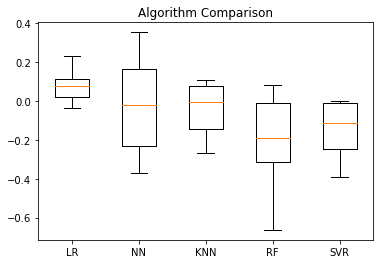

In [ ]:
# Spot Check Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor

models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=10)
    
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [ ]:
from sklearn.metrics import make_scorer
import numpy as np
def rmse(actual, predict):
  predict = np.array(predict)
  actual = np.array(actual)
  distance = predict - actual
  square_distance = distance ** 2
  mean_square_distance = square_distance.mean()
  score = np.sqrt(mean_square_distance)
  return score
rmse_score = make_scorer(rmse, greater_is_better = False)

In [ ]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [ ]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.1188
mean_squared_log_error:  0.2133
r2:  0.043
MAE:  12.9313
MSE:  253.2939
RMSE:  15.9152
